# Table visualisation

Table object provides a convenience function which allows us to plot the data stored. Plotting is performed using `matplotlib` and the method is `mpl`.

Let us demonstrate plotting using the data obtained from a macrospin example:

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (1e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (1, 1, 1)  # discretisation cell size (m)

Ms = 8e6  # magnetisation saturation (A/m)
H = (0, 0, 2e6)  # external magnetic field (A/m)
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

system = mm.System(name='macrospin')
system.energy = mm.Zeeman(H=H)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

td = mc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)

Running OOMMF (ExeOOMMFRunner) [2020/07/02 15:16]... (3.2 s)


By calling `mpl` method, default plot is shown:

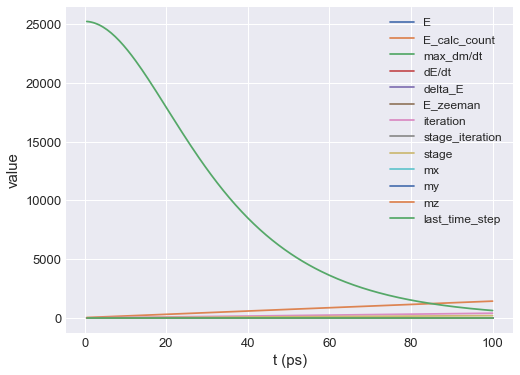

In [2]:
system.table.mpl()

By default, all data columns are plotted. To select only certain data columns, `yaxis` can be passed. `yaxis` is a list of strings, where each string matches one of the columns. For instance, if we want to plot the average magnetisation components, the plot is:

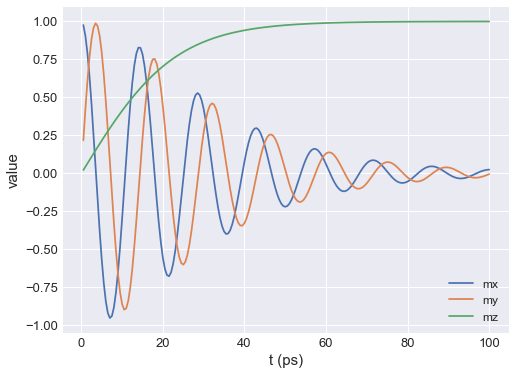

In [3]:
system.table.mpl(yaxis=['mx', 'my', 'mz'])

Data columns are always plotted over the entire range of time values. If we want to restrict it, we can pass `xlim`, which is a lenght-2 tuple defining the range of time values on the horizontal axis:

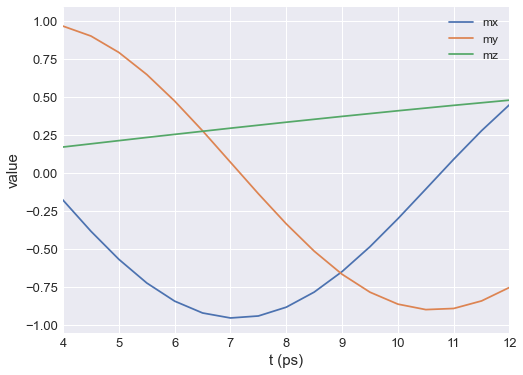

In [4]:
system.table.mpl(yaxis=['mx', 'my', 'mz'], xlim=(4e-12, 12e-12))

`ubermagtable` automatically chooses the SI prefix (nano, micro, etc.) it is going to use to divide the time axis with and show those units on the axes. Sometimes `ubermagtable` does not choose the SI prefix we expected. In those cases, we can explicitly pass it using `multiplier` argument. ``multiplier`` can be passed as $10^{n}$, where $n$ is a multiple of 3 (..., -6, -3, 0, 3, 6,...). For instance, if `multiplier=1e-9` is passed, all axes will be divided by $1\,\text{ns}$ and $\text{ns}$ units will be used as axis labels.

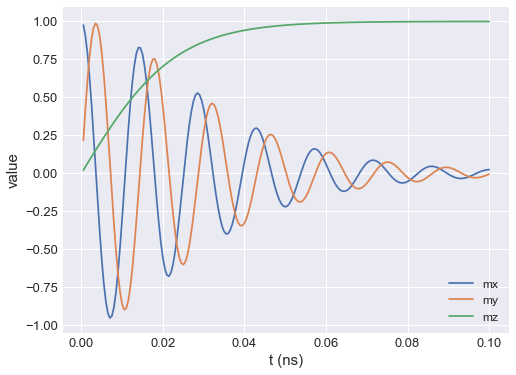

In [5]:
system.table.mpl(yaxis=['mx', 'my', 'mz'], multiplier=1e-9)

If we want to save the plot, we pass `filename`, mesh plot is going to be shown and the plot will be saved in our working directory as a PDF.

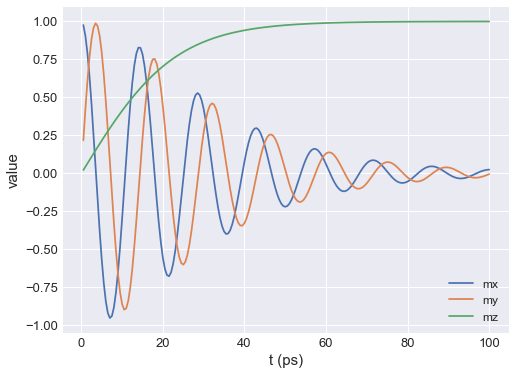

In [6]:
system.table.mpl(yaxis=['mx', 'my', 'mz'], filename='my-table-plot.pdf')

`mpl` mesh plot is based on [`matplotlib.pyplot.plot` function](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html). Therefore, any parameter accepted by it can be passed. For instance:

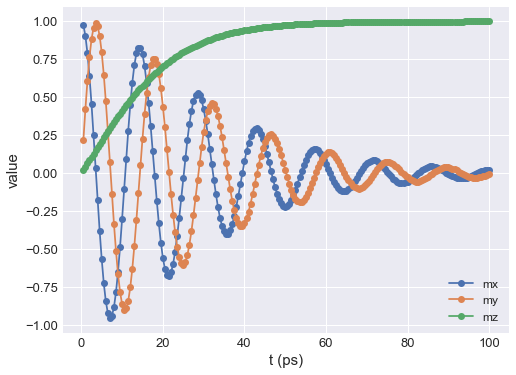

In [7]:
system.table.mpl(yaxis=['mx', 'my', 'mz'], marker='o')

Finally, we show how to expose the axes on which the mesh is plotted, so that we can customise them. We do that by creating the axes ourselves and then passing them to `mpl` function.

Text(0, 0.5, 'average magnetisation')

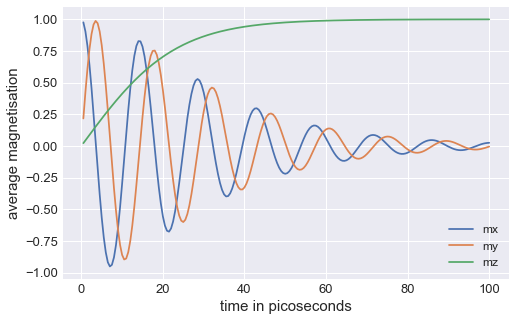

In [9]:
import matplotlib.pyplot as plt

# Create the axes
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

# Add the region to the axes
system.table.mpl(ax=ax, yaxis=['mx', 'my', 'mz'])

# Customise the axes
ax.set_xlabel('time in picoseconds')
ax.set_ylabel('average magnetisation')

This way, by exposing the axes and passing any allowed `matplotlib.pyplot.plot` argument, we can customise the plot any way we like (as long as it is allowed by `matplotlib`).